In [135]:
import numpy as np
import statsmodels.api as sm
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amsmath, physics}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=20, labelsize=18)
plt.rc("figure", titlesize=20)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

# 10.3.6

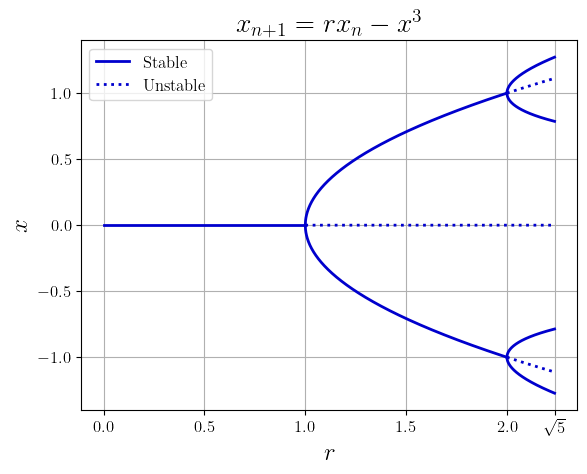

In [20]:
r1 = np.linspace(0, 1, 1000)
r2 = np.linspace(1, 2, 1000)
r3 = np.linspace(2, np.math.sqrt(5), 1000)

p = np.sqrt((r3 + np.sqrt(r3**2 - 4))/2)
q = np.sqrt((r3 - np.sqrt(r3**2 - 4))/2)

fig, ax = plt.subplots()
ax.set_xlabel("$r$")
ax.set_ylabel("$x$")
ax.set_title(r"$x_{n+1} = rx_n - x^3$")

ax.plot(r1, np.zeros_like(r1), c="mediumblue", lw=2, label="Stable")
ax.plot(np.concatenate((r2, r3)), np.zeros(len(r1) + len(r2)),
         c="mediumblue", lw=2, ls="dotted", label="Unstable")

ax.plot(r2, np.sqrt(r2 - 1), c="mediumblue", lw=2)
ax.plot(r2, -np.sqrt(r2 - 1), c="mediumblue", lw=2)
ax.plot(r3, np.sqrt(r3 - 1), c="mediumblue", lw=2, ls="dotted")
ax.plot(r3, -np.sqrt(r3 - 1), c="mediumblue", lw=2, ls="dotted")

ax.plot(r3, p, c="mediumblue", lw=2)
ax.plot(r3, q, c="mediumblue", lw=2)
ax.plot(r3, -p, c="mediumblue", lw=2)
ax.plot(r3, -q, c="mediumblue", lw=2)

ax.set_xticks([0.0, 0.5, 1.0, 1.5, 2.0, np.sqrt(5)])
ax.set_xticklabels(["$0.0$", "$0.5$", "$1.0$", "$1.5$", "$2.0$", "$\\sqrt{5}$"])
ax.grid()
ax.legend()

plt.savefig("10.3.6.d.pdf", bbox_inches="tight")
plt.show()

# Lorenz Map

In [21]:
def lorenz(t, x, r, sigma, b):
    return (
        sigma * (x[1] - x[0]),
        r * x[0] - x[1] - x[0] * x[2],
        x[0] * x[1] - b * x[2]
    )

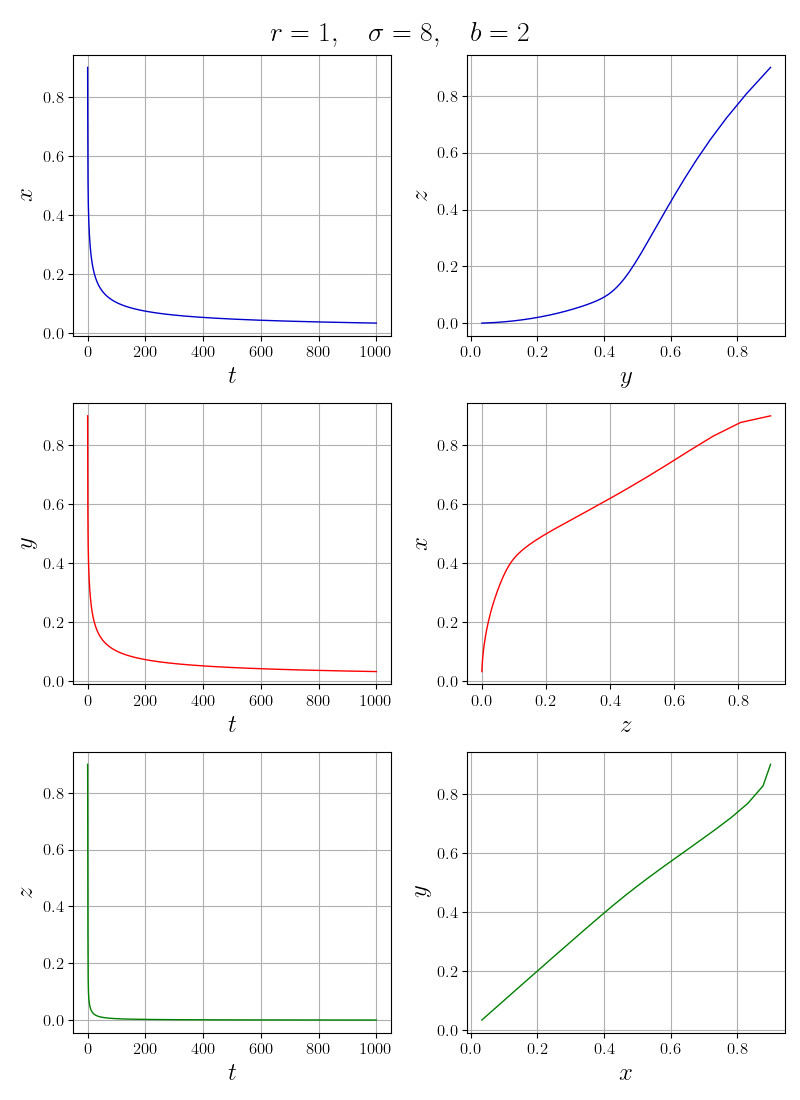

In [124]:
r, sigma, b = 1, 8, 2
sol = solve_ivp(lorenz, (0, 1000), (0.9, 0.9, 0.9), args=(r, sigma, b),
                method="BDF", dense_output=True)
t = np.linspace(0, 1000, 10000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("lorenz1.pdf", bbox_inches="tight")
plt.show()

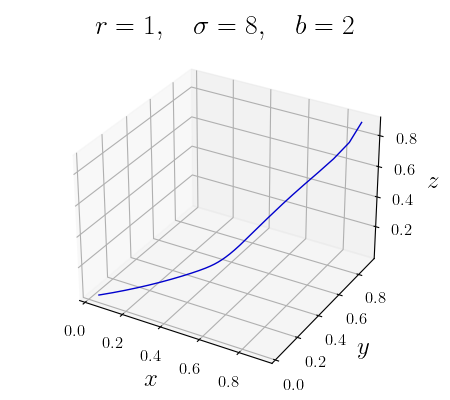

In [126]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=1)

plt.tight_layout()
plt.savefig("lorenz1-3d.pdf")
plt.show()

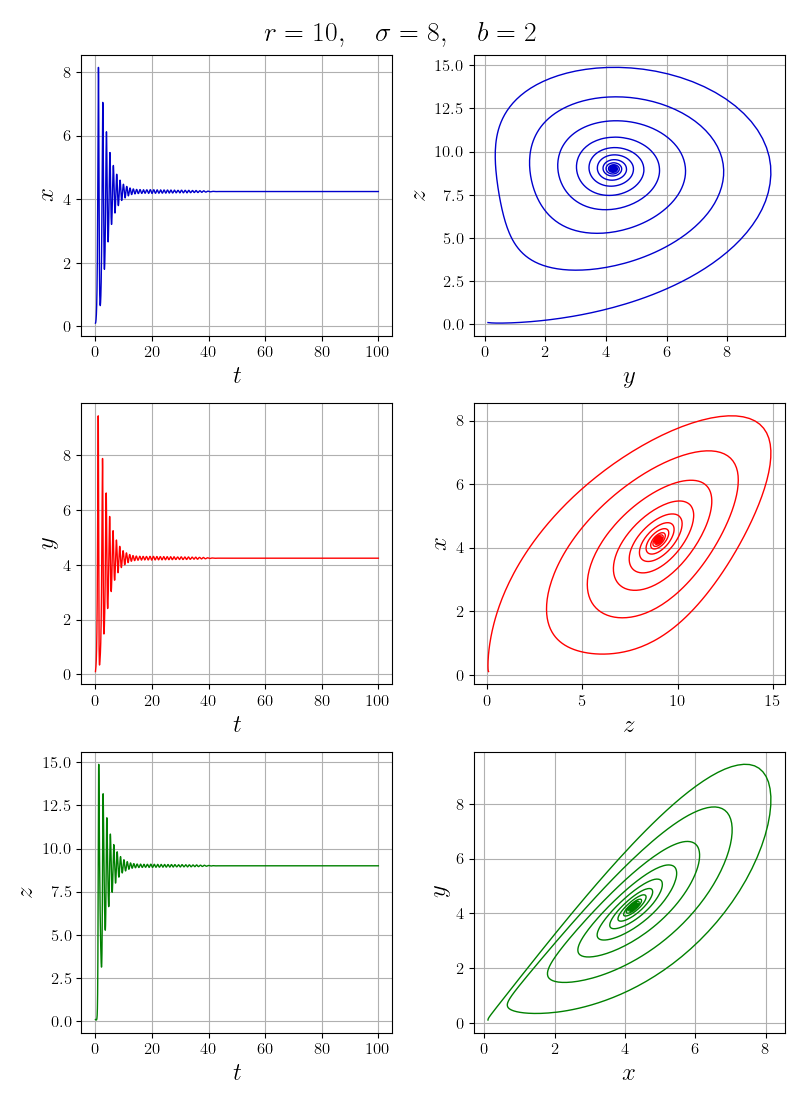

In [127]:
r, sigma, b = 10, 8, 2
sol = solve_ivp(lorenz, (0, 100), (0.1, 0.1, 0.1), args=(r, sigma, b),
                method="BDF", dense_output=True)
t = np.linspace(0, 100, 10000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("lorenz2.pdf", bbox_inches="tight")
plt.show()

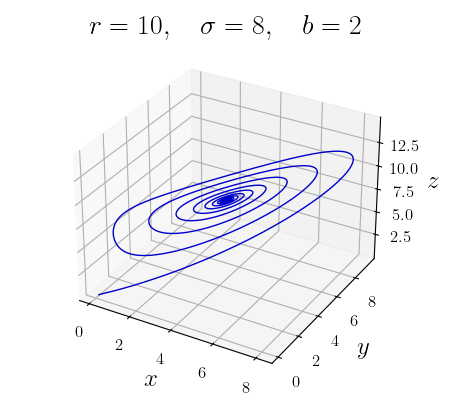

In [129]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=1)

plt.tight_layout()
plt.savefig("lorenz2-3d.pdf")
plt.show()

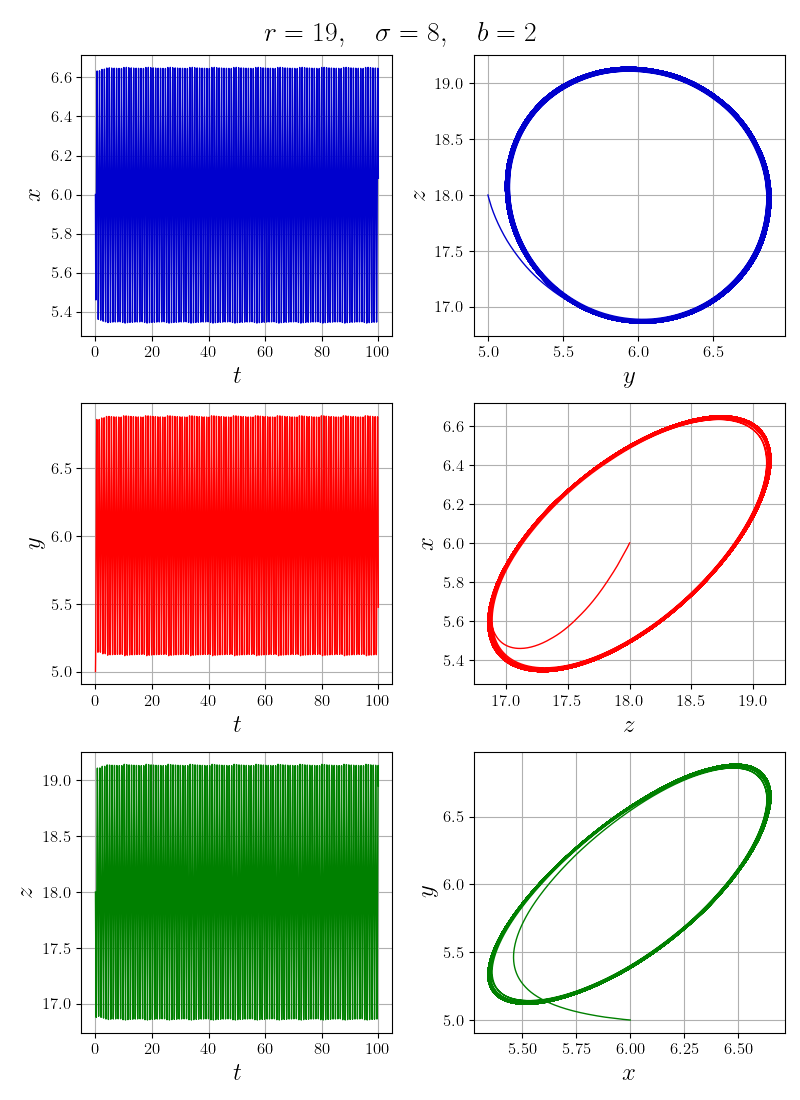

In [130]:
r, sigma, b = 19, 8, 2
sol = solve_ivp(lorenz, (0, 100), (6, 5, 18), args=(r, sigma, b),
                method="BDF", dense_output=True)
t = np.linspace(0, 100, 100000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("lorenz3.pdf", bbox_inches="tight")
plt.show()

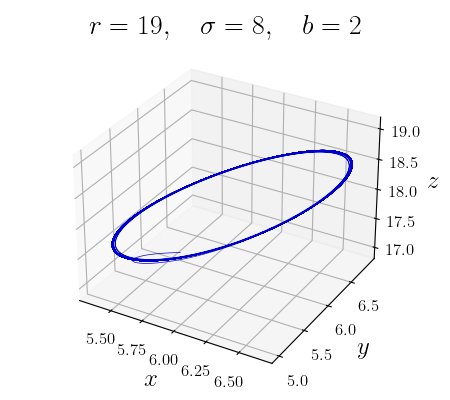

In [131]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=0.5)

plt.tight_layout()
plt.savefig("lorenz3-3d.pdf")
plt.show()

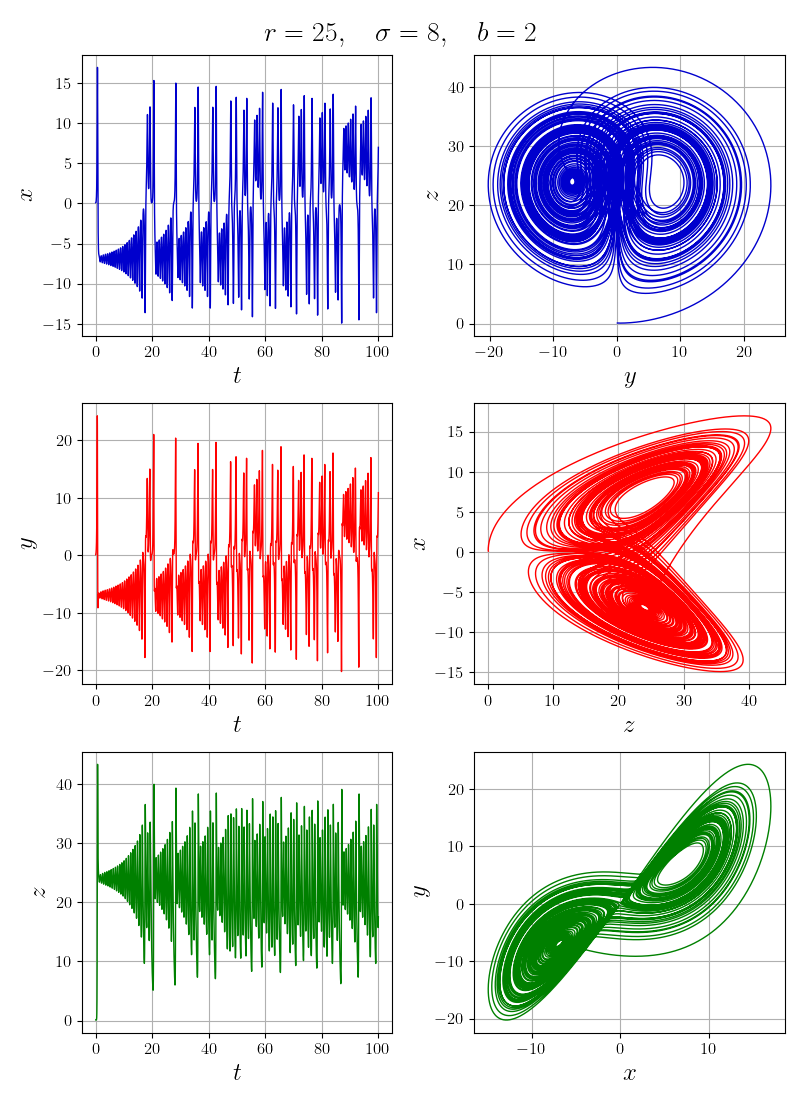

In [132]:
r, sigma, b = 25, 8, 2
sol = solve_ivp(lorenz, (0, 100), (0.1, 0.1, 0.1), args=(r, sigma, b),
                method="BDF", dense_output=True)
t = np.linspace(0, 100, 100000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("lorenz4.pdf", bbox_inches="tight")
plt.show()

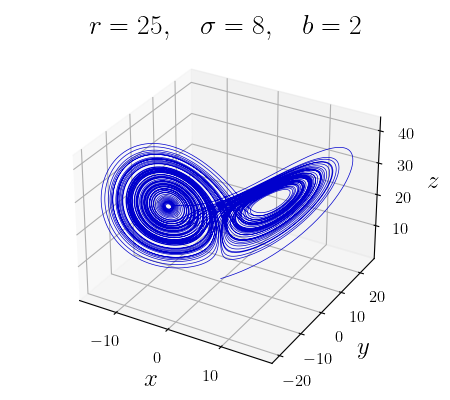

In [133]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=0.5)

plt.tight_layout()
plt.savefig("lorenz4-3d.pdf")
plt.show()

In [142]:
count = 1000
lambda_avg = 0.0
for _ in range(count):
    sol = solve_ivp(lorenz, (0, 20), (0.896, 1.561, 11.246),
                    args=(r, sigma, b), method="BDF", dense_output=True)
    t = np.linspace(0, 20, 10000)
    x, y, z = sol.sol(t)

    randnums = 0.001 * np.random.rand(3)
    sol = solve_ivp(lorenz, (0, 20),
        (0.896 + randnums[0], 1.561 + randnums[1], 11.246 + randnums[2]),
        args=(r, sigma, b), method="BDF", dense_output=True)
    t = np.linspace(0, 20, 10000)
    xnew, ynew, znew = sol.sol(t)

    delta = ((xnew - x)**2 + (ynew - y)**2 + (znew - z)**2)**0.5
    tfit, deltafit = t[500:4751], delta[500:4751]
    fit = sm.OLS(np.log(deltafit), sm.add_constant(tfit)).fit()
    lambda_avg += fit.params[1] / count
print(lambda_avg)

1.0560205407029117


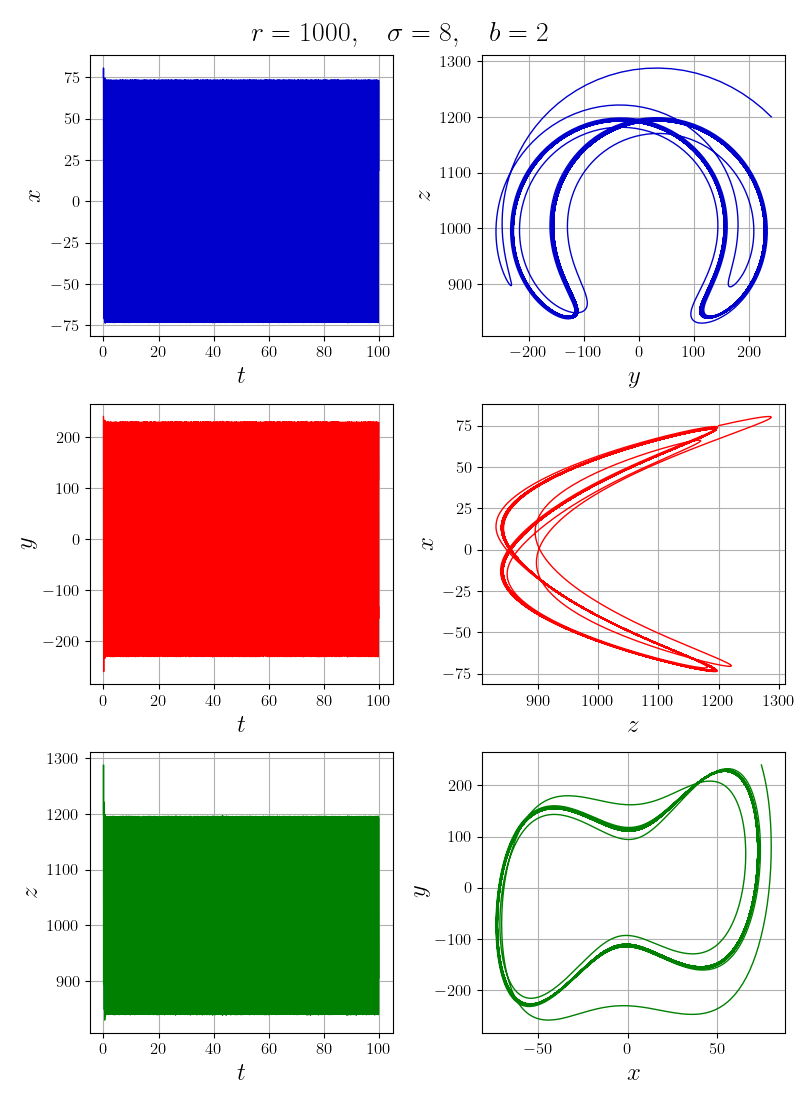

In [147]:
r, sigma, b = 1000, 8, 2
sol = solve_ivp(lorenz, (0, 100), (75, 240, 1200), args=(r, sigma, b),
                method="BDF", dense_output=True)
t = np.linspace(0, 100, 100000)
xyz = sol.sol(t)

fig, axs = plt.subplots(3, 2, figsize=(8, 11))
fig.suptitle(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
labels = ("$x$", "$y$", "$z$")
colors = ("mediumblue", "red", "green")
for i in range(3):
    axs[i, 0].set_xlabel("$t$")
    axs[i, 0].set_ylabel(labels[i])
    axs[i, 1].set_xlabel(labels[(i + 1) % len(labels)])
    axs[i, 1].set_ylabel(labels[(i + 2) % len(labels)])
    
    axs[i, 0].plot(t, xyz[i], color=colors[i], lw=1)
    axs[i, 1].plot(xyz[(i + 1) % len(labels)], xyz[(i + 2) % len(labels)],
                   color=colors[i], lw=1)

    axs[i, 0].grid()
    axs[i, 1].grid()

plt.tight_layout()
plt.savefig("lorenz5.pdf", bbox_inches="tight")
plt.show()

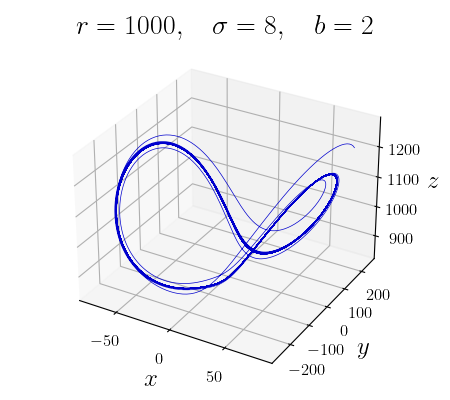

In [148]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure(figsize=(4.5, 4))
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title(fr"$r = {r},\quad \sigma = {sigma},\quad b = {b}$")
ax.plot(xyz[0], xyz[1], xyz[2], color="mediumblue", lw=0.5)

plt.tight_layout()
plt.savefig("lorenz5-3d.pdf")
plt.show()